In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
df=pd.read_csv("df_combined_new")
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_male,LunchType_standard
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,0.0,1.0
1,female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,0.0,1.0
2,female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,0.0,1.0
3,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,1.0,0.0
4,male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,female,3,2,standard,1,2,2,0,2.0,1,0,59,61,65,0.0,1.0
29113,male,4,2,standard,1,2,1,0,1.0,0,0,58,53,51,1.0,1.0
29114,female,2,2,free/reduced,0,1,2,0,1.0,0,0,61,70,67,0.0,0.0
29115,female,3,0,standard,0,1,1,0,3.0,1,0,82,90,93,0.0,1.0


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [3]:
# a) Find the mean, median and average scores in mathematics, reading and writing.
columns=df.loc[:,('MathScore', 'ReadingScore', 'WritingScore')]
result=columns.agg(['mean','median'])
result

,MathScore,ReadingScore,WritingScore
mean,66.559948,69.390081,68.429337
median,67.000000,70.000000,69.000000


In [4]:
#b)Find the mean, median and average scores for males and females
grouped_gender = df.groupby('Gender')[['MathScore', 'ReadingScore', 'WritingScore']]
result=grouped_gender.agg(['mean','median']).transpose() 
result

Gender                  female       male
MathScore    mean    64.119419  69.038488
             median  64.000000  69.000000
ReadingScore mean    72.900825  65.824657
             median  73.000000  66.000000
WritingScore mean    72.899189  63.889866
             median  73.000000  64.000000

In [5]:
#c)What is the coefficient of variation of the scores?
Scores=df[['MathScore', 'ReadingScore', 'WritingScore']]
std=Scores.std() 
mean=Scores.mean()
CV=(std/mean) * 100
CV



MathScore       23.053283
ReadingScore    21.271326
WritingScore    22.574845
dtype: float64

3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.



In [6]:
from scipy import stats
male=df.Gender_male==1
Male_scores=df.loc[male,'MathScore']
Female_scores=df.loc[~male,'MathScore']
p_value=stats.ttest_ind(Male_scores,Female_scores)
print("P-value:", p_value)

 
# p-vrijednost manja je od 0,05 i odbacujemo nultu hipotezu

P-value: TtestResult(statistic=27.70843426303627, pvalue=8.09604172877808e-167, df=29115.0)


4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [7]:
from scipy import stats
male=df.Gender_male==1
Male_scores=df.loc[male,'WritingScore']
Female_scores=df.loc[~male,'WritingScore']
p_value=stats.ttest_ind(Male_scores,Female_scores)
print("P-value:", p_value)
#ako je p_value nula znači da postoji vrlo velika razlika između uspoređivanih grupa i da je potrebno odbaciti nultu hipotezu

P-value: TtestResult(statistic=-52.01694529394566, pvalue=0.0, df=29115.0)


5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

In [8]:
#MathScore
from scipy.stats import shapiro
male=df.Gender_male==1
Male_Scores=df.loc[male,'MathScore']
Female_scores=df.loc[~male,'MathScore']
stat, p_M = shapiro(Male_Scores)
stat, p_F = shapiro(Female_scores)
print('M:','stat=%.3f, p=%.3f' % (stat, p_M))
print('F:','stat=%.3f, p=%.3f' % (stat, p_F))

M: stat=0.996, p=0.000
F: stat=0.996, p=0.000


C:\Users\Katarina\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


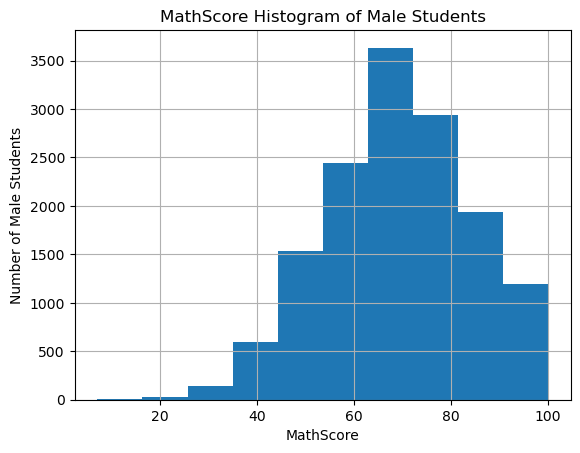

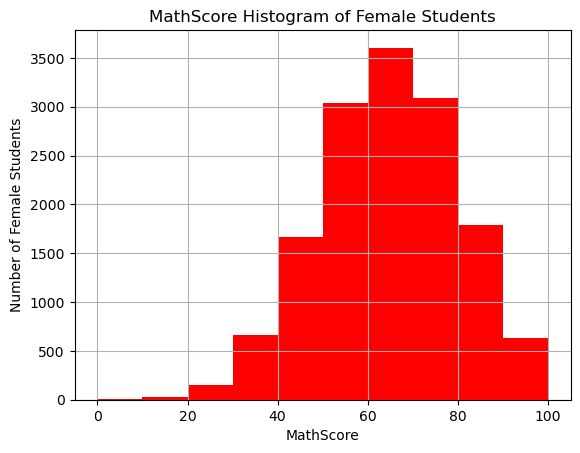

In [9]:
Male_Scores.hist()
plt.title('MathScore Histogram of Male Students')
plt.xlabel('MathScore')
plt.ylabel('Number of Male Students')
plt.show()
Female_scores.hist(color=(1, 0, 0))
plt.title('MathScore Histogram of Female Students')
plt.xlabel('MathScore')
plt.ylabel('Number of Female Students')
plt.show()

In [10]:
#ReadingScore
from scipy.stats import shapiro
male=df.Gender_male==1
MaleScores=df.loc[male,'ReadingScore']
FemaleScores=df.loc[~male,'ReadingScore']
stat, p_M = shapiro(MaleScores)
stat, p_F = shapiro(FemaleScores)
print('M:','stat=%.3f, p=%.3f' % (stat, p_M))
print('F:','stat=%.3f, p=%.3f' % (stat, p_F))

M: stat=0.990, p=0.000
F: stat=0.990, p=0.000


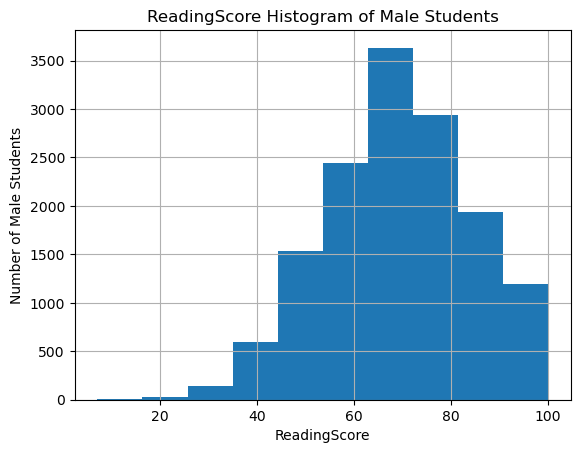

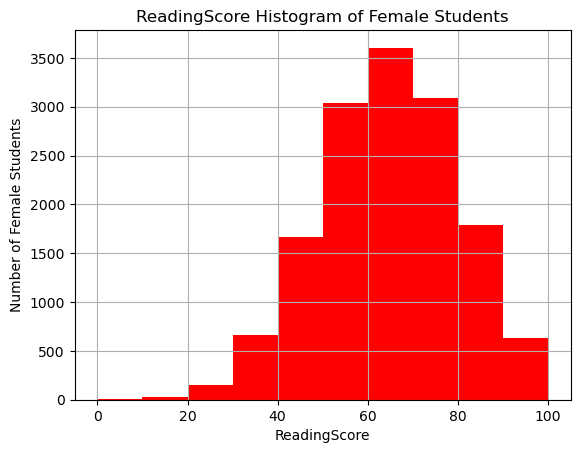

In [11]:
Male_Scores.hist()
plt.title('ReadingScore Histogram of Male Students')
plt.xlabel('ReadingScore')
plt.ylabel('Number of Male Students')
plt.show()
Female_scores.hist(color=(1, 0, 0))
plt.title('ReadingScore Histogram of Female Students')
plt.xlabel('ReadingScore')
plt.ylabel('Number of Female Students')
plt.show()

In [12]:
#WritingScore

Male_Scores=df.loc[male,'WritingScore']
Female_scores=df.loc[~male,'WritingScore']
stat, p_M = shapiro(Male_Scores)
stat, p_F = shapiro(Female_scores)
print('M:','stat=%.3f, p=%.3f' % (stat, p_M))
print('F:','stat=%.3f, p=%.3f' % (stat, p_F))


M: stat=0.989, p=0.000
F: stat=0.989, p=0.000


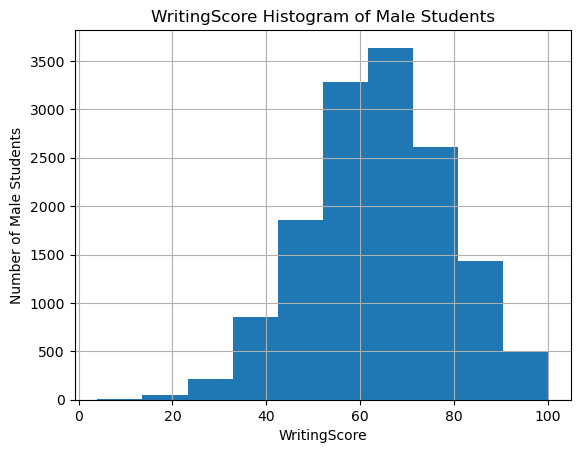

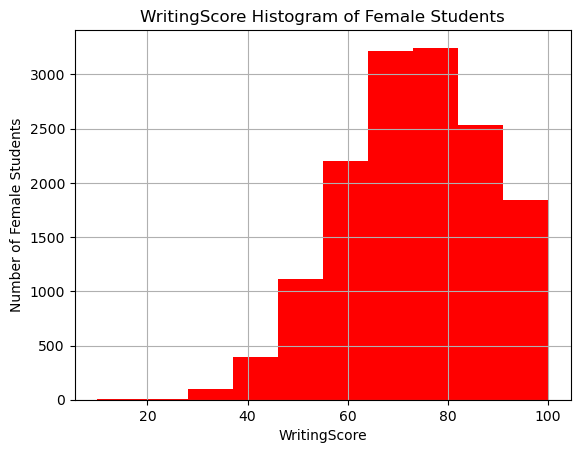

In [13]:
Male_Scores.hist()
plt.title('WritingScore Histogram of Male Students')
plt.xlabel('WritingScore')
plt.ylabel('Number of Male Students')
plt.show()
Female_scores.hist(color=(1, 0, 0))
plt.title('WritingScore Histogram of Female Students')
plt.xlabel('WritingScore')
plt.ylabel('Number of Female Students')
plt.show()